Name: Feifan Gu /
Github Username: Feifan126 /
USC ID: 8135699631

#### 1. Time Series Classification Part 1: Feature Creation/Extraction

(a) Download the AReM data

In [1]:
import os
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split

dataset = "../data/"
activity_folders = ["bending1", "bending2", "cycling", "lying", "sitting", "standing", "walking"]
columns = ['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']

(b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1,
2, and 3 in other folders as test data and other datasets as train data

In [2]:
def split_train_test(data_path):
    train, test = [], []
    
    for root, _, files in os.walk(data_path):
        activity = os.path.basename(root)
        
        for file in files:
            if file.endswith(".csv"):
                df = pd.read_csv(os.path.join(root, file), header=None, skiprows=4, on_bad_lines='skip',sep=',')
                df.columns = columns
                df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x) 
                df = df.apply(pd.to_numeric, errors='coerce')
                df['activity'] = activity
                csv_idx = int(re.findall(r'\d+', file)[0])
                if csv_idx <= 2 or (activity not in ['bending1', 'bending2'] and csv_idx == 3):
                    test.append(df)
                else:
                    train.append(df)
                    
    return train, test

train_data, test_data = split_train_test(dataset)

(c) Feature Extraction

i. Research what types of time-domain features are usually used in time series
classification and list them

Basic Statistical Features  
These features capture fundamental properties of the signal.  
Mean (𝜇) – The average value of the time series.  
Minimum (𝑋𝑚𝑖𝑛​) – The smallest value in the time series.  
Maximum (𝑋𝑚𝑎𝑥) – The largest value in the time series.  
Range (𝑋𝑚𝑎𝑥−𝑋𝑚𝑖𝑛) – The difference between max and min.  
Median – The middle value of the time series when sorted.  
Mode – The most frequently occurring value.  

Dispersion & Variability Features  
These features measure the spread and variability in the data.  
Variance (𝜎2) – Measures the spread of the data.  
Standard Deviation (STD) – The square root of the variance.  
Interquartile Range (IQR) – The range between the 25th and 75th percentiles.  
Mean Absolute Deviation (MAD) – The average of the absolute differences from the mean.  
Coefficient of Variation (CV) – The ratio of the standard deviation to the mean.  

Shape-Based Features  
These features describe the shape and distribution of the time series.  
Skewness – Measures the asymmetry of the distribution.  
Kurtosis – Measures the "tailedness" of the distribution.  
Slope – The rate of change over time.  
Zero Crossing Rate – Number of times the signal crosses zero.  

Peak & Energy Features  
These features analyze signal peaks and amplitude variations.  
Root Mean Square (RMS) – Measures signal energy.  
Peak-to-Peak (P2P) – Difference between max and min values.  
Crest Factor – Ratio of the max absolute value to the RMS.  
Energy – Sum of squared values.  
Signal Magnitude Area (SMA) – Sum of absolute values.  

Temporal & Dynamic Features  
These features capture changes over time.  
Autocorrelation – Measures how similar the time series is to a lagged version of itself.  
Lag-1 Autocorrelation – Measures correlation with previous value.  
Slope Sign Changes – Counts the number of times the slope changes sign.  
Entropy – Measures the randomness of the signal.  
Hjorth Parameters:  
Activity – Signal variance.  
Mobility – Standard deviation of the first derivative.  
Complexity – Changes in frequency patterns.  

Histogram-Based Features  
These features are derived from histogram distributions.  
Histogram Bins – Splitting the data into bins and counting occurrences.  
Mode Count – The number of times the most frequent value appears.

ii. Extract the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time series
in each instance.

In [3]:
def extract_features(df):
    features = {}
    for col in columns[1:]:
        features[f'{col}_min'] = df[col].min()
        features[f'{col}_max'] = df[col].max()    
        features[f'{col}_mean'] = df[col].mean()
        features[f'{col}_median'] = df[col].median()
        features[f'{col}_std'] = df[col].std()
        features[f'{col}_1st_quantile'] = df[col].quantile(0.25)
        features[f'{col}_3rd_quantile'] = df[col].quantile(0.75)
    return features

train_features =pd.DataFrame([extract_features(df) for df in train_data])
test_features = pd.DataFrame([extract_features(df) for df in test_data])
all_features = pd.concat([train_features, test_features], ignore_index=True)

In [4]:
new_columns = {
    "avg_rss12_min": "min1", "avg_rss12_max": "max1", "avg_rss12_mean": "mean1", "avg_rss12_median": "median1",
    "avg_rss12_std": "std1", "avg_rss12_1st_quantile": "1st quart1", "avg_rss12_3rd_quantile": "3rd quart1",
    "var_rss12_min": "min2", "var_rss12_max": "max2", "var_rss12_mean": "mean2", "var_rss12_median": "median2",
    "var_rss12_std": "std2", "var_rss12_1st_quantile": "1st quart2", "var_rss12_3rd_quantile": "3rd quart2",
    "avg_rss13_min": "min3", "avg_rss13_max": "max3", "avg_rss13_mean": "mean3", "avg_rss13_median": "median3",
    "avg_rss13_std": "std3", "avg_rss13_1st_quantile": "1st quart3", "avg_rss13_3rd_quantile": "3rd quart3",
    "var_rss13_min": "min4", "var_rss13_max": "max4", "var_rss13_mean": "mean4", "var_rss13_median": "median4",
    "var_rss13_std": "std4", "var_rss13_1st_quantile": "1st quart4", "var_rss13_3rd_quantile": "3rd quart4",
    "avg_rss23_min": "min5", "avg_rss23_max": "max5", "avg_rss23_mean": "mean5", "avg_rss23_median": "median5",
    "avg_rss23_std": "std5", "avg_rss23_1st_quantile": "1st quart5", "avg_rss23_3rd_quantile": "3rd quart5",
    "var_rss23_min": "min6", "var_rss23_max": "max6", "var_rss23_mean": "mean6", "var_rss23_median": "median6",
    "var_rss23_std": "std6", "var_rss23_1st_quantile": "1st quart6", "var_rss23_3rd_quantile": "3rd quart6"
}

all_features.rename(columns=new_columns, inplace=True)
all_features = all_features.reset_index(drop=True) 
all_features.index = all_features.index + 1 
all_features.index.name = 'instance' 

print(all_features)

           min1   max1      mean1  median1      std1  1st quart1  3rd quart1  \
instance                                                                       
1         36.25  48.00  43.969125   44.500  1.618364       43.31     44.6700   
2         37.00  48.00  43.454958   43.250  1.386098       42.50     45.0000   
3         33.00  47.75  42.179813   43.500  3.670666       39.15     45.0000   
4         33.00  45.75  41.678063   41.750  2.243490       41.33     42.7500   
5         35.00  47.40  43.954500   44.330  1.558835       43.00     45.0000   
...         ...    ...        ...      ...       ...         ...         ...   
84        24.75  48.33  44.182937   48.000  7.495615       48.00     48.0000   
85        48.00  48.25  48.004167   48.000  0.032038       48.00     48.0000   
86        24.25  45.00  37.177042   36.250  3.581301       34.50     40.2500   
87        28.75  44.75  37.561187   36.875  3.226507       35.25     40.2500   
88        22.00  44.67  37.058708   36.0

iii. Estimate the standard deviation of each of the time-domain features you
extracted from the data.

In [13]:
train_features.rename(columns=new_columns, inplace=True)
test_features.rename(columns=new_columns, inplace=True)

In [14]:
stds1 = train_features.std()
print('standard deviation for train features:', '\n', stds1)
stds2 = test_features.std()
print('standard deviation for test features:', '\n', stds2)
stds3 = all_features.std()
print('standard deviation for all features:', '\n', stds3)

standard deviation for train features: 
 min1          8.856393
max1          4.192017
mean1         4.825351
median1       4.872952
std1          1.757164
1st quart1    5.690502
3rd quart1    4.622275
min2               0.0
max2          5.144249
mean2         1.605203
median2       1.438386
std2          0.905071
1st quart2    0.954504
3rd quart2    2.165661
min3          3.052281
max3          4.687709
mean3         3.821131
median3       3.809429
std3          1.003087
1st quart3    4.099894
3rd quart3    3.919557
min4               0.0
max4          2.302288
mean4         1.182739
median4       1.153896
std4          0.474327
1st quart4    0.843928
3rd quart4    1.570131
min5          5.343307
max5           5.48932
mean5         5.149689
median5       5.299754
std5          1.042442
1st quart5    5.568136
3rd quart5    4.993026
min6          0.052145
max6          2.559028
mean6         1.174397
median6       1.108818
std6          0.518618
1st quart6    0.778097
3rd quart6    1.

In [15]:
from sklearn.utils import resample

def bootstrap(data, num_iterations=1000, alpha=0.1):
    bootstrapped_stds = []
    
    for _ in range(num_iterations):
        sample = resample(data, replace=True, n_samples=len(data))
        bootstrapped_stds.append(sample.std())
    
    lower = np.percentile(bootstrapped_stds, 100 * alpha / 2)
    upper = np.percentile(bootstrapped_stds, 100 * (1 - alpha / 2))
    
    return lower, upper

ci_results = train_features.apply(lambda x: bootstrap(x))

for feature, ci in ci_results.items():
    print(f'{feature} 90% CI for Standard Deviation: {ci}')

min1 90% CI for Standard Deviation: 0     7.678402
1    10.075268
Name: min1, dtype: float64
max1 90% CI for Standard Deviation: 0    3.080316
1    5.172996
Name: max1, dtype: float64
mean1 90% CI for Standard Deviation: 0    4.248235
1    5.353062
Name: mean1, dtype: float64
median1 90% CI for Standard Deviation: 0    4.236683
1    5.442211
Name: median1, dtype: float64
std1 90% CI for Standard Deviation: 0    1.538684
1    1.952798
Name: std1, dtype: float64
1st quart1 90% CI for Standard Deviation: 0    5.106377
1    6.175426
Name: 1st quart1, dtype: float64
3rd quart1 90% CI for Standard Deviation: 0    3.784550
1    5.379037
Name: 3rd quart1, dtype: float64
min2 90% CI for Standard Deviation: 0    0.0
1    0.0
Name: min2, dtype: float64
max2 90% CI for Standard Deviation: 0    4.665763
1    5.505397
Name: max2, dtype: float64
mean2 90% CI for Standard Deviation: 0    1.410592
1    1.743918
Name: mean2, dtype: float64
median2 90% CI for Standard Deviation: 0    1.244262
1    1.5775

iv. Use your judgement to select the three most important time-domain features.

In [16]:
train_features['label'] = [df['activity'].iloc[0] for df in train_data]
bending_train = pd.DataFrame(train_features)
bending_train.loc[bending_train['label'].isin(['bending1', 'bending2']), 'label'] = 1
bending_train.loc[bending_train['label'] != 1, 'label'] = 0
print(bending_train)

     min1   max1      mean1  median1      std1  1st quart1  3rd quart1  min2  \
0   36.25  48.00  43.969125    44.50  1.618364      43.310       44.67   0.0   
1   37.00  48.00  43.454958    43.25  1.386098      42.500       45.00   0.0   
2   33.00  47.75  42.179813    43.50  3.670666      39.150       45.00   0.0   
3   33.00  45.75  41.678063    41.75  2.243490      41.330       42.75   0.0   
4   35.00  47.40  43.954500    44.33  1.558835      43.000       45.00   0.0   
..    ...    ...        ...      ...       ...         ...         ...   ...   
64  18.50  44.25  35.752354    36.00  4.614802      33.000       39.33   0.0   
65  24.25  45.00  37.177042    36.25  3.581301      34.500       40.25   0.0   
66  23.33  43.50  36.248768    36.75  3.824632      33.415       39.25   0.0   
67  26.25  44.25  36.957458    36.29  3.434863      34.500       40.25   0.0   
68  27.75  44.67  37.142359    36.33  3.762442      34.000       40.50   0.0   

     max2     mean2  ...  1st quart5  3

/var/folders/z5/p623_8n54rg7n5k8q4brrmqw0000gn/T/ipykernel_46741/203813933.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(bending_train.loc[bending_train['label'] == 1, f + str(i)],
/var/folders/z5/p623_8n54rg7n5k8q4brrmqw0000gn/T/ipykernel_46741/203813933.py:12: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(bending_train.loc[bending_train['label'] == 0, f + str(i)],
/var/folders/z5/p623_8n54rg7n5k8q4brrmqw0000gn/T/ipykernel_46741/203813933.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(bending_train.loc[bending_train['label'] == 1, f + str(i)],
/var/folders/z5/p623_8n54rg7n5k8q4brrmqw0000gn/T/ipykernel_46741/203813933.py:12: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable 

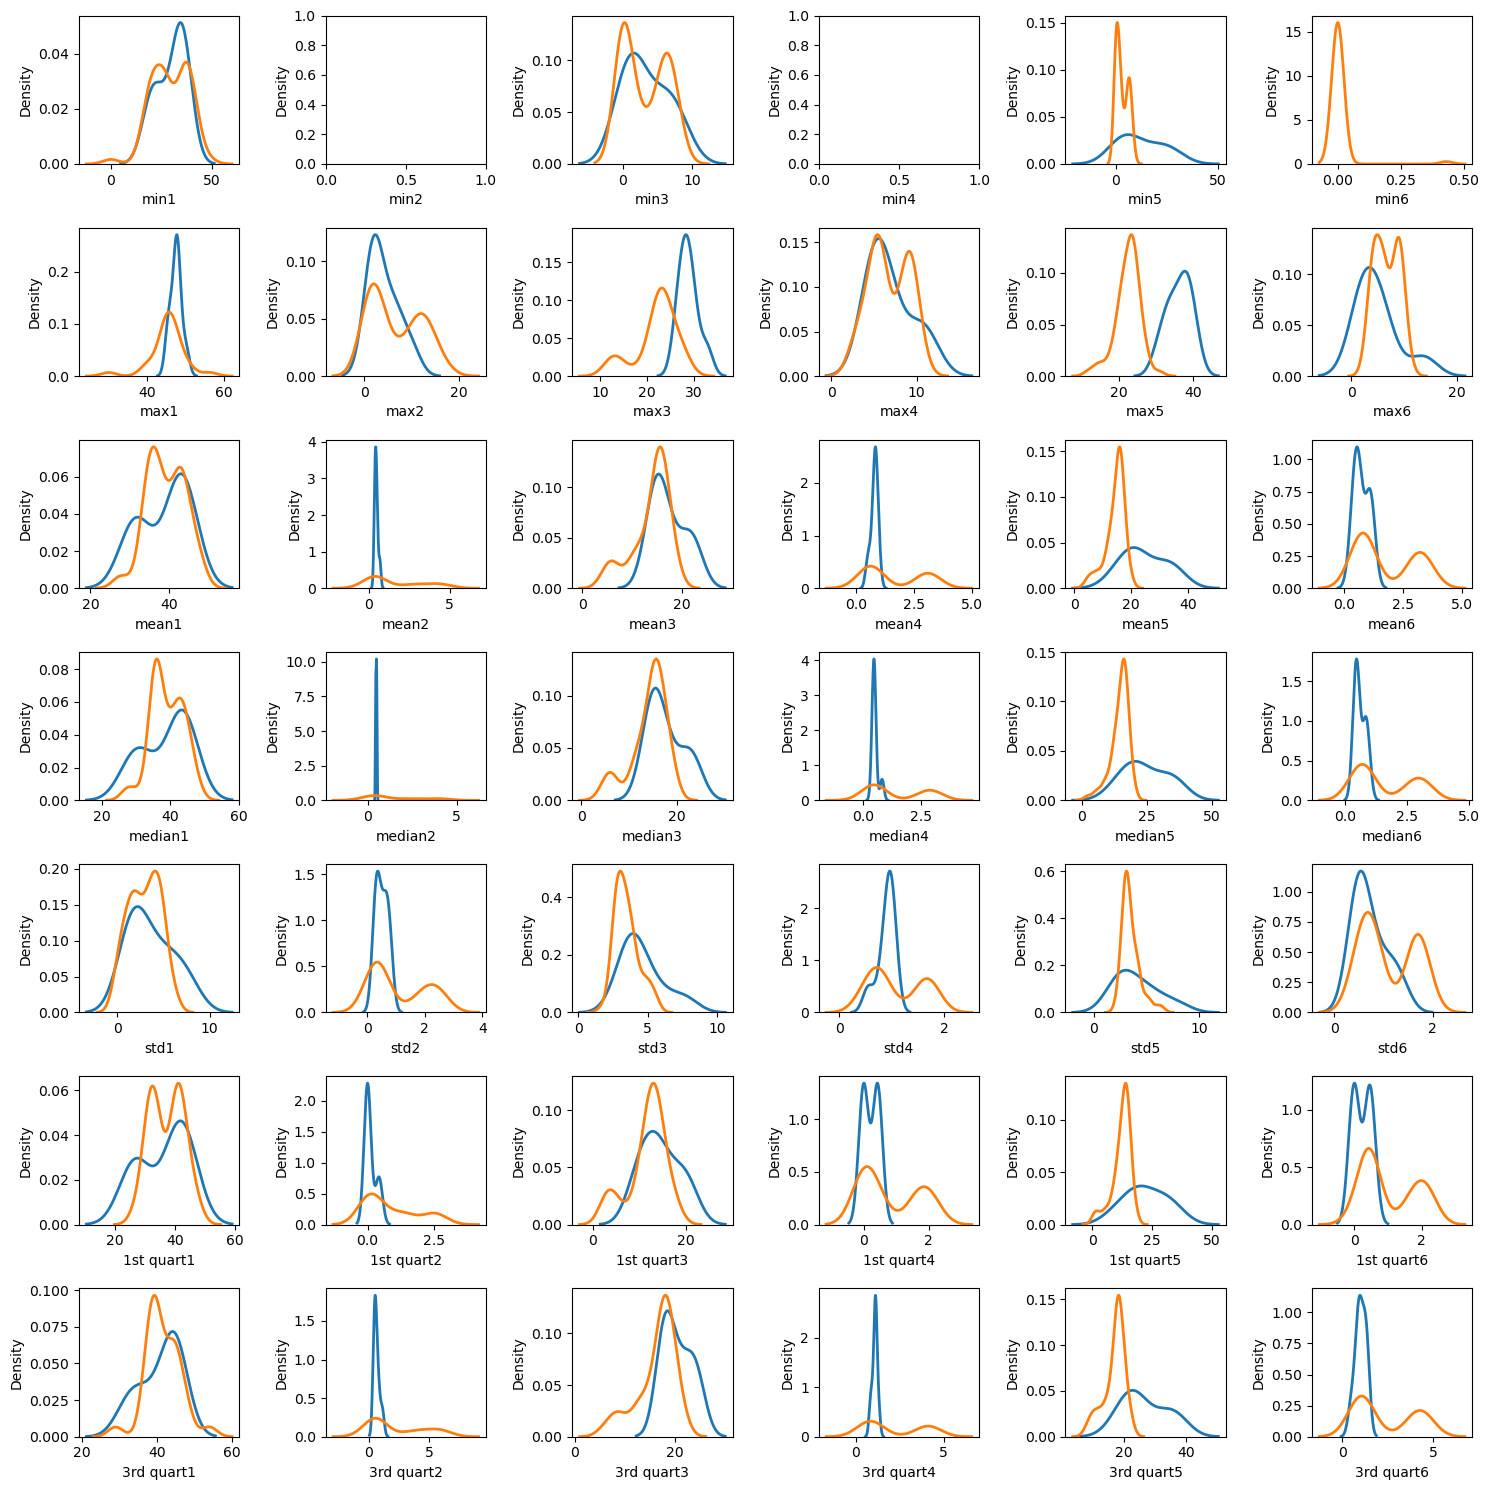

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['min', 'max', 'mean', 'median', 'std', '1st quart', '3rd quart']

fig, axes = plt.subplots(7, 6, figsize=(15, 15))

for i in range(1, 7):
    for j, f in enumerate(features):
        sns.kdeplot(bending_train.loc[bending_train['label'] == 1, f + str(i)], 
                    ax=axes[j, i-1], label='Bending', linewidth=2)
        sns.kdeplot(bending_train.loc[bending_train['label'] == 0, f + str(i)], 
                    ax=axes[j, i-1], label='Not Bending', linewidth=2)
        
plt.tight_layout()
plt.show()

Since we are doing classification, a clear and easier dicision boundary is better. So the three most important time-domain features are max, mean, and 3rd quart.

#### 2. ISLR 3.7.4

I collect a set of data (n = 100 observations) containing a single
predictor and a quantitative response. I then fit a linear regression
model to the data, as well as a separate cubic regression, i.e. Y=
β0 + β1X + β2X2 + β3X3 + ϵ. 

(a) Suppose that the true relationship between X and Y is linear,
i.e. Y= β0 + β1X + ϵ. Consider the training residual sum of
squares (RSS) for the linear regression, and also the training
RSS for the cubic regression. Would we expect one to be lower
than the other, would we expect them to be the same, or is there
not enough information to tell? Justify your answer.  

<font color = navy>A linear regression model is correctly reflect the relationship between X and Y, so it should provide the best possible fit to the data. However, a cubic regression model introduces more higher-order terms. Althought these terms are unnecessary, the cubic regression model fit at least as well as the linear model, which will cause RSS reducing. As a result, we would expect the cubic regression has a lower RSS.

(b) Answer (a) using test rather than training RSS.  

<font color = navy>When it comes to test data, unnecessary terms can lead to overfitting. The extra terms will capture noise, which means the cubic regression model generalizes worse and increases the RSS. So we would expect the linear regression has a lower RSS.

(c) Suppose that the true relationship between X and Y is not linear,
but we don’t know how far it is from linear. Consider the training
RSS for the linear regression, and also the training RSS for the
cubic regression. Would we expect one to be lower than the
other, would we expect them to be the same, or is there not
enough information to tell? Justify your answer.  

<font color = navy>If the true relationship is not linear, the cubic model is more likely to approximate the true relationship. Because the cubic regression model has more parameters, it can fit the training data at least as well as the linear regression model. All in all, we would expect the cubic regression model has a lower RSS.

(d) Answer (c) using test rather than training RSS.

<font color = navy>It depends. If the linear regression model does not fit, the cubic regression model has more possibility to capture the true relationship. However, the cubic one can also overfit. So the RSS depends on whether the true function is slightly nonlinear or strongly nonlinear.